# Predicting the prices of houses in the Taiwan real estate dataset

### (A) Determine the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset
- the independent (explanatory) variable: n_convenience (number of bearby convience stores)
- the dependent (response) variable: price_twd_msq (price per meter square using Taiwan dollars)

### (B) Determine the relationship between house price per area and the distance to the nearest MRT (metro) station using the Taiwan real estate dataset
- the independent (explanatory) variable: dist_to_mrt_m (the distance to the nearest MRT (metro) station)
- the dependent (response) variable: price_twd_msq (price per meter square using Taiwan dollars)

### (C) Determine the relationship between house price per area and the age of the houses using the Taiwan real estate dataset
- the independent (explanatory) variable: house_age_years (the age of the houses in years)
- the dependent (response) variable: price_twd_msq (price per meter square using Taiwan dollars)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the ols function
from statsmodels.formula.api import ols
# Import qqplot
from statsmodels.api import qqplot

import warnings
warnings.filterwarnings('ignore')

### (A) The relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset

In [2]:
# Load the data
taiwan_real_estate = pd.read_csv("../data/taiwan_real_estate2.csv")
print(taiwan_real_estate.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


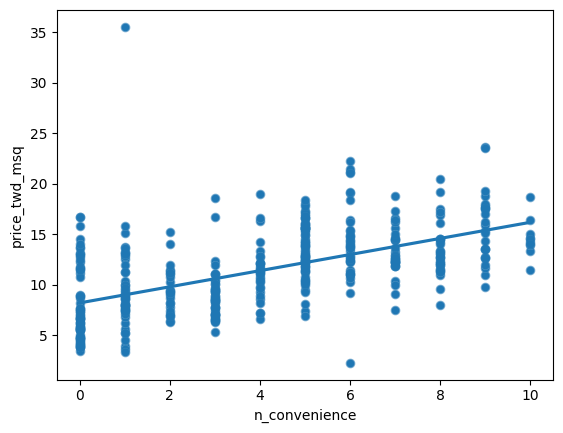

In [23]:
# Visualising the independent (explanatory) and dependent (response) variables

# The scatter plot of the independent and dependent variables
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# A trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

plt.show()

In [44]:
# Linear regression with Ordinary Least Squares (OLS)

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq~n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print("Model parameters:")
print("Intercept: ", mdl_price_vs_conv.params[0])
print("Slope: ", mdl_price_vs_conv.params[1])
print("The coefficient of determination (r2):", mdl_price_vs_conv.rsquared)

# Print The model summary
print(mdl_price_vs_conv.summary())

Model parameters:
Intercept:  8.224237452790337
Slope:  0.798079716612507
The coefficient of determination (r2): 0.32604660851305045
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           3.41e-37
Time:                        09:17:11   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


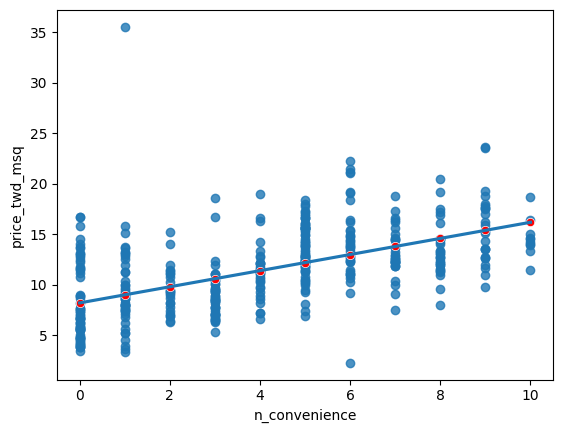

In [41]:
# Making predictions

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x='n_convenience',
            y='price_twd_msq',
            data=prediction_data,
            color='red')

# Show the layered plot
plt.show()

In [48]:
# response value = fitted value + residual

print("The fitted values of the model:\n", mdl_price_vs_conv.fittedvalues)
print("The residuals of the model:\n", mdl_price_vs_conv.resid)


The fitted values of the model:
 0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64
The residuals of the model:
 0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [49]:
# Manually predicting house prices: response = slope * explanatory + intercept

# Get the intercept
intercept = mdl_price_vs_conv.params[0]

# Get the slope
slope = mdl_price_vs_conv.params[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


### (B) The relationship between house price per area and the distance to the nearest MRT (metro) station using the Taiwan real estate dataset

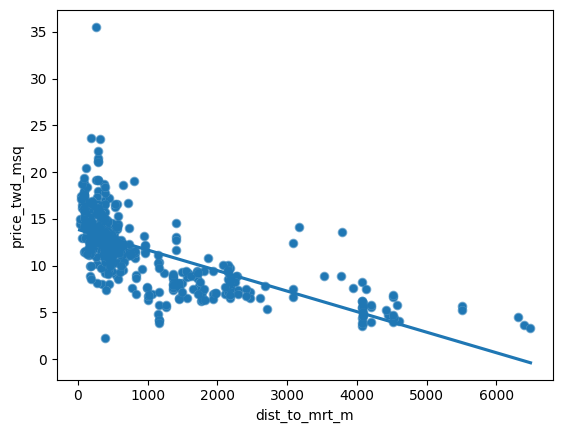

In [50]:
# Visualising the independent (explanatory) and dependent (response) variables

# The scatter plot of the independent and dependent variables
sns.scatterplot(x="dist_to_mrt_m",
                y="price_twd_msq",
                data=taiwan_real_estate)

# A trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="dist_to_mrt_m",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

plt.show()

In [51]:
# Transforming the explanatory variable

# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

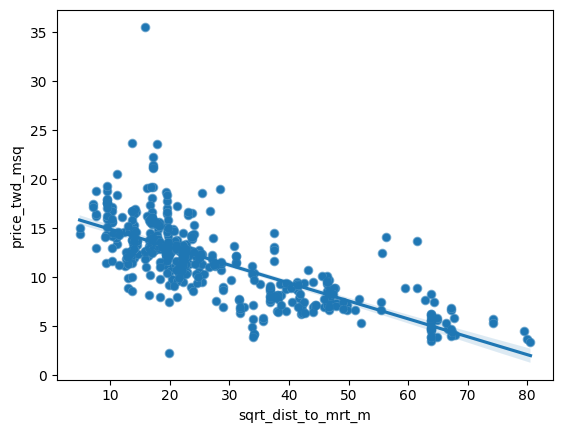

In [55]:
# Visualising the independent (explanatory) and dependent (response) variables after transformation

# The scatter plot of the independent and dependent variables
sns.scatterplot(x="sqrt_dist_to_mrt_m",
                y="price_twd_msq",
                data=taiwan_real_estate)

# A trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="sqrt_dist_to_mrt_m",
         y="price_twd_msq",
         data=taiwan_real_estate,
         scatter_kws={'alpha': 0.5})

plt.show()

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64
   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


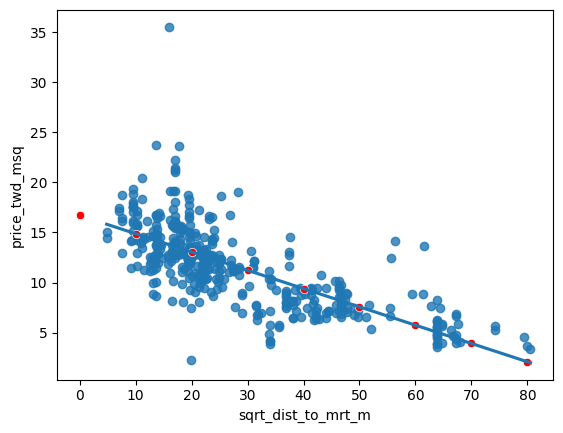

In [56]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq~sqrt_dist_to_mrt_m",
data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

print(prediction_data)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()


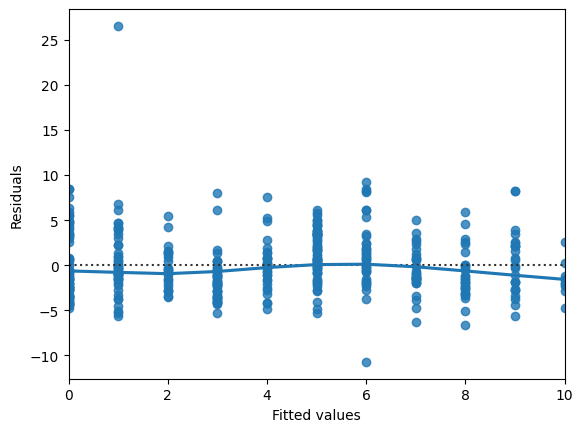

In [57]:
# Plot the residuals vs. fitted values

sns.residplot(x="n_convenience", y="price_twd_msq", 
              data=taiwan_real_estate, 
              lowess=True
              )
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.show()

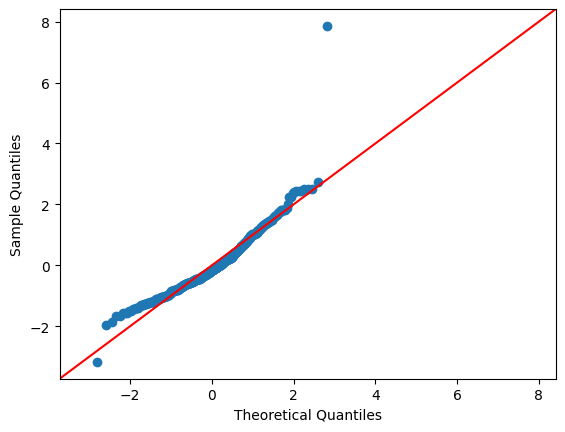

In [59]:
# Create the Q-Q plot of the residuals

qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

plt.show()

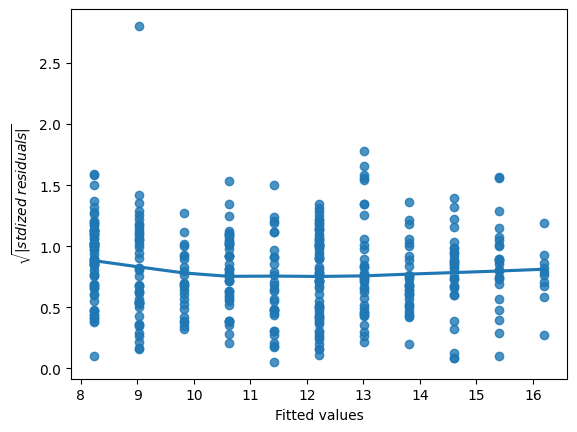

In [76]:
# Scale-location plot

# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, 
            lowess=True
            )
plt.xlabel("Fitted values")
plt.ylabel(r"$\sqrt{|stdized _ residuals|}$")

plt.show()


In [77]:
# Extracting leverage and influence

# Which observations had the highest leverage and influence. 


# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate['cooks_dist'] = summary_info['cooks_d']

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values(by='cooks_dist', ascending =False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  


### (C) The relationship between house price per area and the age of the houses using the Taiwan real estate dataset

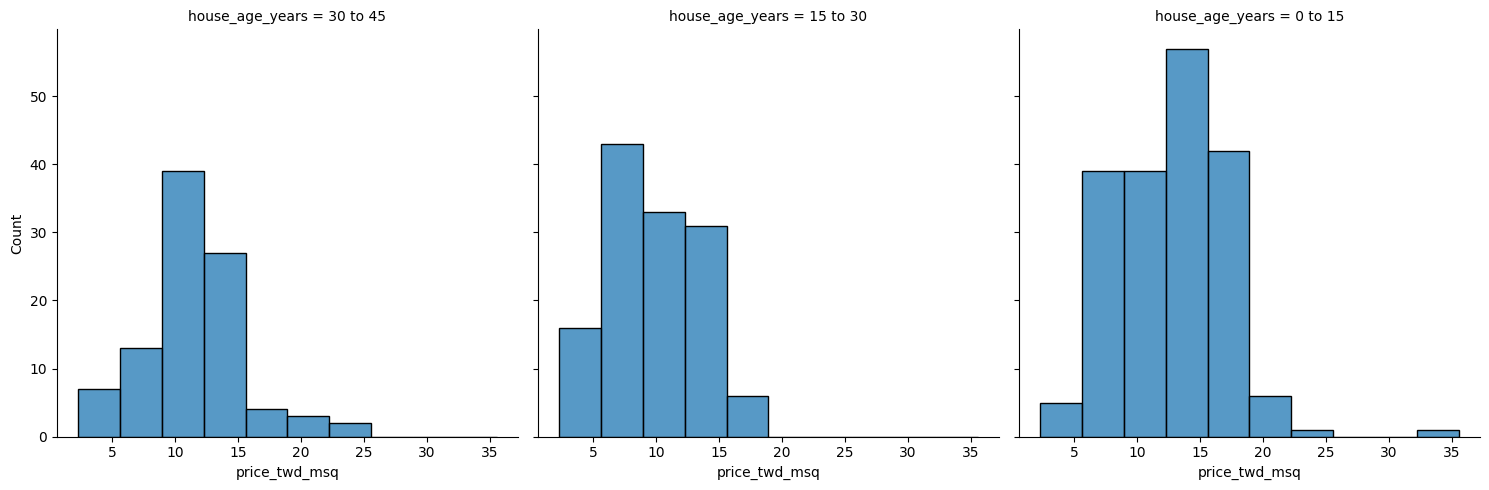

In [78]:
# Histograms of price_twd_msq, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         col_wrap=3,
         bins=10)

plt.show()

In [79]:
# The mean of price_twd_msq, grouped by house age

mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [80]:
# The model, fit it
mdl_price_vs_age = ols('price_twd_msq~house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64
